In [5]:
import numpy as np
import pandas as pd
import keras
from keras.utils import np_utils

Using TensorFlow backend.


In [6]:
keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 8s 1us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [7]:
(x_Train, y_Train), (x_Test, y_Test) = keras.datasets.mnist.load_data()

In [8]:
print('x_train_image:',x_Train.shape)
print('y_train_label:',y_Train.shape)

x_train_image: (60000, 28, 28)
y_train_label: (60000,)


In [9]:
print('x_test_image:',x_Test.shape)
print('y_test_label:',y_Test.shape)

x_test_image: (10000, 28, 28)
y_test_label: (10000,)


In [10]:
import matplotlib.pyplot as plt
def plot_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2, 2)
    plt.imshow(image, cmap='binary')
    plt.show()

In [11]:
x_Train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

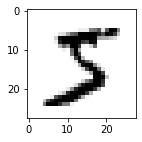

In [12]:
plot_image(x_Train[0])

In [13]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,
                                  prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= "label=" +str(labels[idx])
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx]) 
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

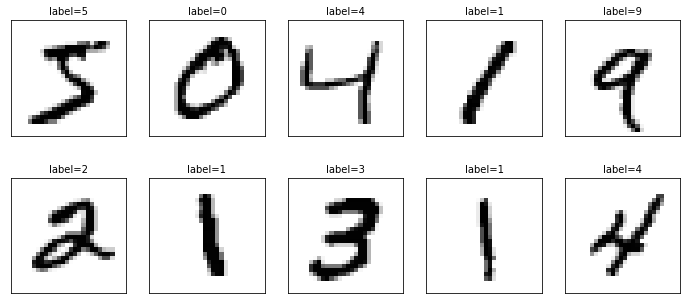

In [14]:
plot_images_labels_prediction(x_Train,y_Train,[],0,10)

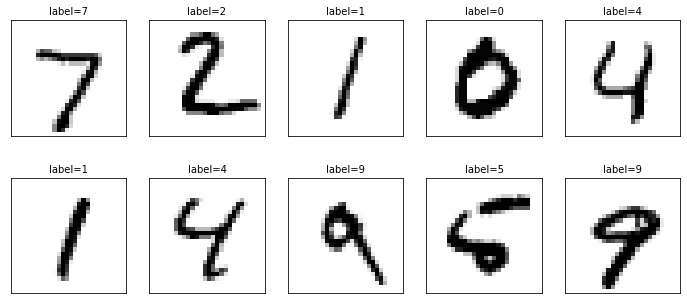

In [15]:
plot_images_labels_prediction(x_Test,y_Test,[],0,10)

In [16]:
x_Train.shape

(60000, 28, 28)

In [17]:
# 多加一個顏色的維度 
x_Train4D=x_Train.reshape(x_Train.shape[0],28,28,1).astype('float32')
x_Test4D=x_Test.reshape(x_Test.shape[0],28,28,1).astype('float32')

In [18]:
x_Train4D.shape

(60000, 28, 28, 1)

In [19]:
# 將數值縮小到0~1
x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255

In [20]:
# 把類別做Onehot encoding
y_TrainOneHot = np_utils.to_categorical(y_Train)
y_TestOneHot = np_utils.to_categorical(y_Test)

In [ ]:
y_Train

In [ ]:
y_TrainOneHot

## CNN

In [21]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [22]:
model = Sequential()

In [23]:
#filter為16, Kernel size為(5,5),Padding為(same)
model.add(Conv2D(filters=16,
                 kernel_size=(5,5),
                 padding='same',
                 input_shape=(28,28,1), 
                 activation='relu'))

In [24]:
# MaxPooling size為(2,2)
model.add(MaxPooling2D(pool_size=(2, 2)))

In [25]:
model.add(Conv2D(filters=36,
                 kernel_size=(5,5),
                 padding='same',
                 activation='relu'))

In [26]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [27]:
# Drop掉部分神經元避免overfitting
model.add(Dropout(0.25))

In [28]:
# 平坦化
model.add(Flatten())

In [29]:
model.add(Dense(128, activation='relu'))

In [30]:
model.add(Dropout(0.5))

In [31]:
model.add(Dense(10,activation='softmax'))

In [32]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)              

## Train Model

In [33]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [34]:
train_history=model.fit(x=x_Train4D_normalize, 
                        y=y_TrainOneHot,validation_split=0.2, 
                        epochs=20, batch_size=300,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
 - 29s - loss: 0.5133 - accuracy: 0.8386 - val_loss: 0.1058 - val_accuracy: 0.9681
Epoch 2/20
 - 30s - loss: 0.1423 - accuracy: 0.9570 - val_loss: 0.0673 - val_accuracy: 0.9787
Epoch 3/20
 - 30s - loss: 0.1014 - accuracy: 0.9699 - val_loss: 0.0604 - val_accuracy: 0.9816
Epoch 4/20
 - 27s - loss: 0.0815 - accuracy: 0.9751 - val_loss: 0.0477 - val_accuracy: 0.9852
Epoch 5/20
 - 30s - loss: 0.0721 - accuracy: 0.9774 - val_loss: 0.0419 - val_accuracy: 0.9879
Epoch 6/20
 - 28s - loss: 0.0617 - accuracy: 0.9813 - val_loss: 0.0402 - val_accuracy: 0.9883
Epoch 7/20
 - 29s - loss: 0.0546 - accuracy: 0.9832 - val_loss: 0.0399 - val_accuracy: 0.9886
Epoch 8/20
 - 30s - loss: 0.0517 - accuracy: 0.9840 - val_loss: 0.0374 - val_accuracy: 0.9891
Epoch 9/20
 - 30s - loss: 0.0459 - accuracy: 0.9860 - val_loss: 0.0346 - val_accuracy: 0.9902
Epoch 10/20
 - 29s - loss: 0.0415 - accuracy: 0.9867 - val_loss: 0.0367 - val_accuracy: 0.9901
Epoch 11/

In [35]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

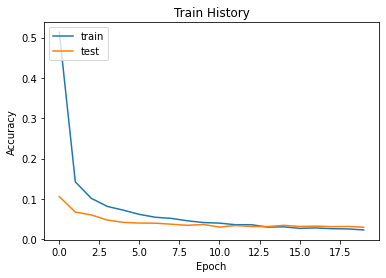

In [37]:
show_train_history('loss','val_loss')

## Evaluate Model

In [38]:
scores = model.evaluate(x_Test4D_normalize , y_TestOneHot)
scores[1]

10000/10000 [==============================] - 2s 194us/step


0.9932000041007996

## Prediction

In [39]:
prediction=model.predict_classes(x_Test4D_normalize)

In [40]:
prediction[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

## Result

In [41]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')

        ax.set_title("label=" +str(labels[idx])+
                     ",predict="+str(prediction[idx])
                     ,fontsize=10) 
        
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

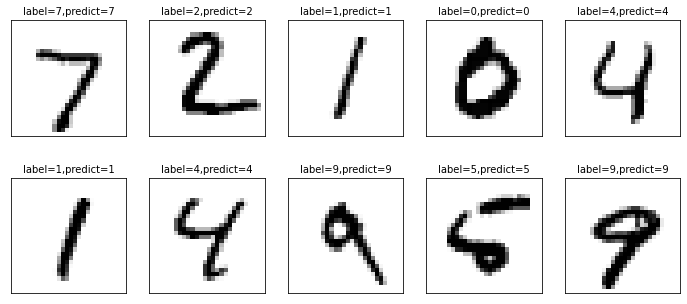

In [42]:
plot_images_labels_prediction(x_Test,y_Test,prediction,idx=0)

## Confusion Matrix

In [43]:
import pandas as pd
pd.crosstab(y_Test,prediction,
            rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,978,0,0,0,0,0,0,1,1,0
1,0,1134,1,0,0,0,0,0,0,0
2,2,0,1029,0,0,0,0,1,0,0
3,0,0,0,1008,0,1,0,0,1,0
4,0,0,0,0,980,0,1,0,0,1
5,2,0,0,6,0,882,1,1,0,0
6,4,2,0,0,3,1,947,0,1,0
7,0,1,6,1,0,0,0,1018,1,1
8,3,0,2,2,1,1,0,1,963,1


In [44]:
df = pd.DataFrame({'label':y_Test, 'predict':prediction})

In [45]:
df[(df.label==5)&(df.predict==3)]

,label,predict
674,5,3
1393,5,3
2035,5,3
2369,5,3
2597,5,3
5937,5,3


In [46]:
df[(df.label==5)&(df.predict==3)].index

Int64Index([674, 1393, 2035, 2369, 2597, 5937], dtype='int64')